In [2]:
import spacy
import pandas as pd
import re
# from DataCleaning import clean_text
import csv
import en_core_web_sm
from spacy.matcher import PhraseMatcher
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import csv
import numpy as np

from tqdm import tqdm 

In [3]:
nlp = en_core_web_sm.load()

print("done0")

done0


In [4]:

keyword_dict = pd.read_csv('skills_dictionary.csv')
stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
R_words = [nlp(text) for text in keyword_dict['R'].dropna(axis = 0)]
python_words = [nlp(text) for text in keyword_dict['Python'].dropna(axis = 0)]
Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]
Business = [nlp(text) for text in keyword_dict['Business'].dropna(axis = 0)]
Software = [nlp(text) for text in keyword_dict['Software'].dropna(axis = 0)]
Other = [nlp(text) for text in keyword_dict['Other'].dropna(axis = 0)]

print("done1")

done1


In [5]:
matcher = PhraseMatcher(nlp.vocab)
matcher.add('Stats', None, *stats_words)
matcher.add('NLP', None, *NLP_words)
matcher.add('ML', None, *ML_words)
matcher.add('DL', None, *DL_words)
matcher.add('R', None, *R_words)
matcher.add('Python', None, *python_words)
matcher.add('DE', None, *Data_Engineering_words)
matcher.add('Biz', None, *Business)
matcher.add('SE', None, *Software)
matcher.add('Other', None, *Other)

print("done2")

done2


In [6]:
def clean_text(text):
    '''
    cleaning the text for the part of speech tagging
    input a string, return a string
    '''
    text = text.lower()

    text = re.sub(r"[()<>/]", ', ', text) # sub ()<>&/ to comma and space
    text = re.sub(r"&", 'and', text) # sub ()<>&/ to comma and space
    text = re.sub(r"[?!]", '. ', text) # sub ?! to dot and space

    text = re.sub(" [a-z0-9]+[\.'\-a-z0-9_]*[a-z0-9]+@\w+\.com", "", text) # sub email address to dot
    text = re.sub('[#"\']', '', text) # remove '#'

    text = re.sub("e\.g\.", '', text) # remove the 'e.g.'
    text = re.sub("it’s", 'it is', text)
    text = re.sub("we’re", 'we are', text)
    text = re.sub("[\t\n\r\f\v]+", ". ", text) # remove \n and \r

    text = re.sub(r'(?<=[.,])(?=[^\s])', r' ', text) # add space after comma and dot


    text = re.sub('\W+\.', '.', text) # remove the empty space before a dot
    text = re.sub('\W+\,', ',', text) # remove the empty space before a comma
    text = re.sub('[,\.]+\.+', '.', text) # sub multiple dots to one dot
    text = re.sub(' +',' ',text) # replace multiple whitespace by one whitespace

    return text

def extract_entities(text):
    d = [] 
    text = str(text)
    text = clean_text(text)
    doc = nlp(text)
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))
    return [i[1] for i,j in Counter(d).items()]

def clean_entity(text):
    text = re.sub('^\W+', '', text)
    text = re.sub('\W+$', '', text)
    text = re.sub(r'[^\x00-\x7F]+','', text)
    return text
        

    

Processing Descriptions: 100%|███████████████████████████████████████████████████| 18261/18261 [18:36<00:00, 16.35it/s]


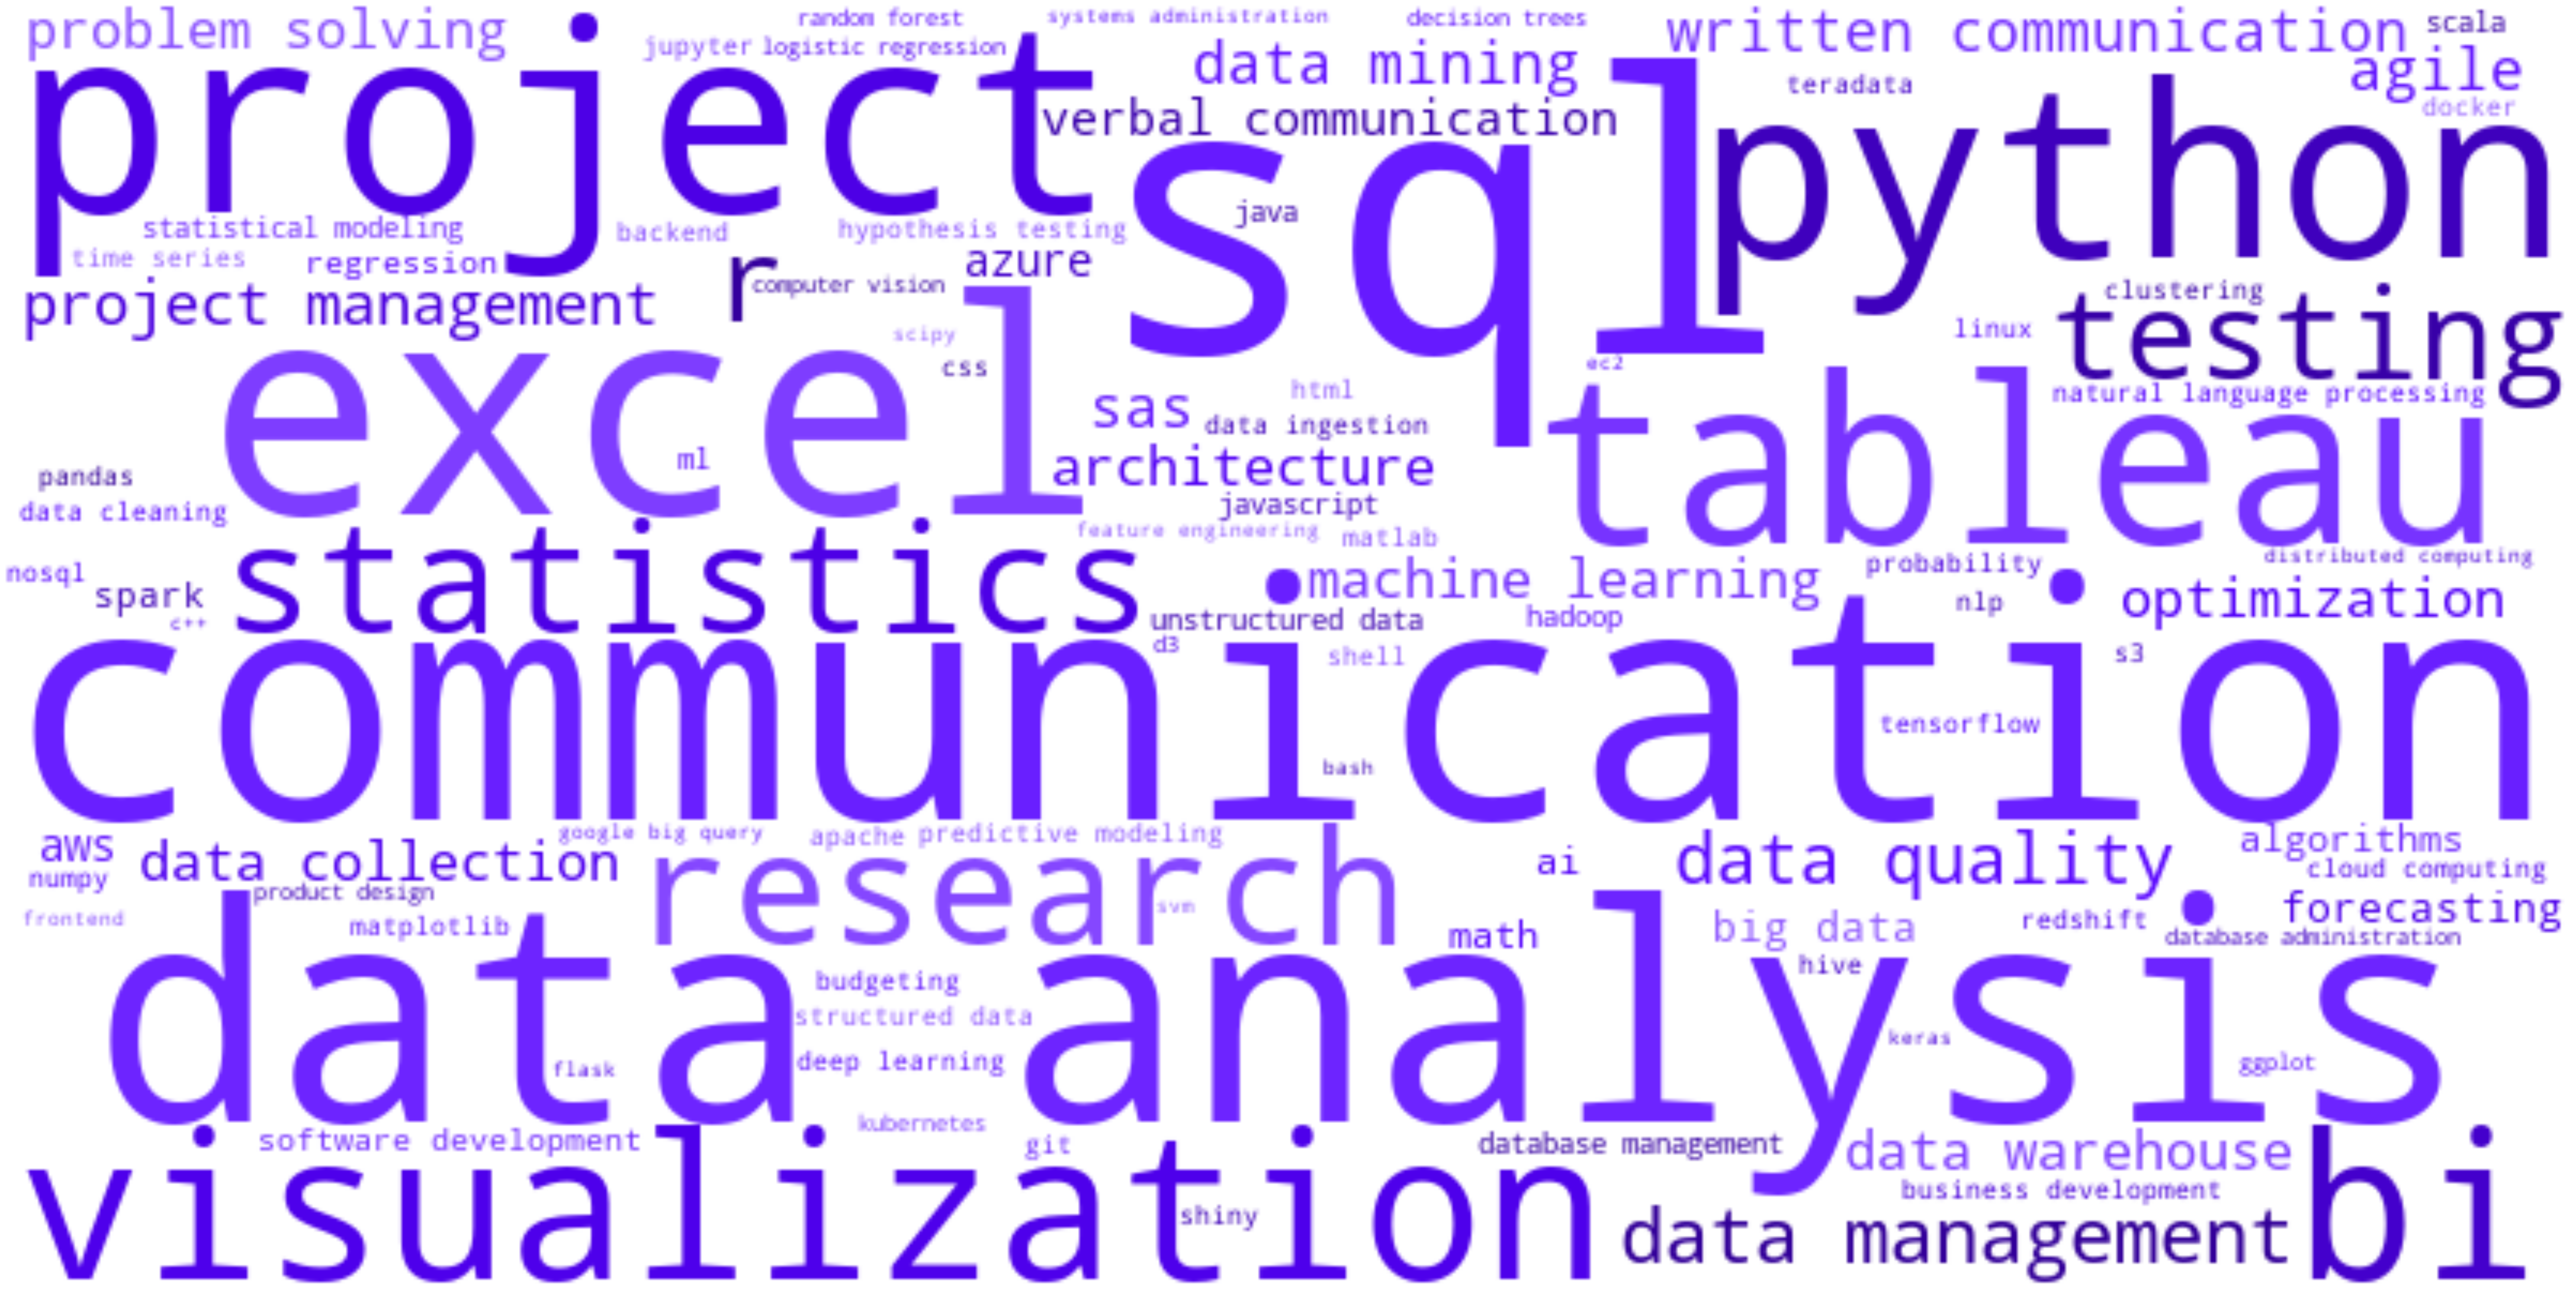

In [7]:
        
if __name__ == '__main__':
    # read file
    df = pd.read_csv("1.5_dataset.csv")
    descriptions = df['description'].values
    
    # extract entities in the file
    entities = []
        # Use tqdm to wrap the loop for progress tracking
    for text in tqdm(descriptions, desc="Processing Descriptions"):
        for x in extract_entities(text):
            entities.append(x)
    word_could_dict=Counter(entities)
    

    
    # write the top skills to csv file
    with open('top_skills.csv','w') as csvfile:
        fieldnames=['Skill', 'Count', 'Percentage']
        writer=csv.writer(csvfile)
        writer.writerow(fieldnames)
        word_could_dict_sort = word_could_dict.most_common()
        n = len(df)
        for key, value in word_could_dict_sort:
            writer.writerow([key] + [value] + [value / n]) 

    
    # generate the word cloud
    def purple_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
        return("hsl(260,100%%, %d%%)" % np.random.randint(30, 70))
    
    wordcloud = WordCloud(width=800, 
                          height=400, 
                          max_words=100,
                          prefer_horizontal=1, 
                          background_color="white").generate_from_frequencies(word_could_dict)
    #change the color setting
    wordcloud.recolor(color_func = purple_color_func)
    
    plt.figure(figsize=(100,50))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud.png')
    

In [8]:
print("done3")

done3
